<a href="https://colab.research.google.com/github/chrisldz/ECON3916-33674-Statistical-Machine-Learning/blob/main/Class%203/Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: CHN (China), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [12]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_chn = df.xs('CHN', axis=1, level=0).copy()

Fetching data...


In [13]:
df_chn.head(10)

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
2000,0.347811,NaN,16.983455,20.681599,33.632683,18.329343,2.825096e+12,2237.442985,36.265233,74.190,706837950.0,3.26
2001,0.719126,NaN,16.565574,20.077687,35.523858,18.004960,3.059936e+12,2405.893967,37.865837,73.878,715928584.0,3.80
2002,-0.731971,NaN,16.223333,22.351823,36.068782,19.842619,3.342778e+12,2610.729603,38.792525,73.563,725938760.0,4.24
2003,1.127603,NaN,15.463135,26.602374,39.428013,24.475106,3.681007e+12,2857.037354,41.731545,73.246,735682023.0,4.58
2004,3.824637,NaN,14.776896,30.609716,41.634374,28.030618,4.053945e+12,3127.862765,44.476216,72.927,744936890.0,4.49
2005,1.776414,8.452438,14.980030,33.368798,40.178087,27.991277,4.518455e+12,3465.817344,45.206956,72.605,754465388.0,4.52
2006,1.649431,8.929483,15.032950,35.526847,39.689700,28.042733,5.091155e+12,3883.354129,46.966282,72.280,761948735.0,4.43
2007,4.816768,9.625737,14.843586,34.906696,40.222088,26.359768,5.811553e+12,4409.757008,48.538094,71.954,766486940.0,4.35
2008,5.925251,9.943414,14.728917,32.092514,41.960725,24.618619,6.373544e+12,4811.474718,49.728908,71.625,769779554.0,4.59


In [14]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chn['Natural_Rate_Unemp'] = df_chn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chn['Productivity'] = df_chn['GDP_Const'] / df_chn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chn['NCO'] = df_chn['Exports_GDP'] - df_chn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chn['Budget_Balance'] = df_chn['Tax_Rev_GDP'] - df_chn['Gov_Exp_GDP']

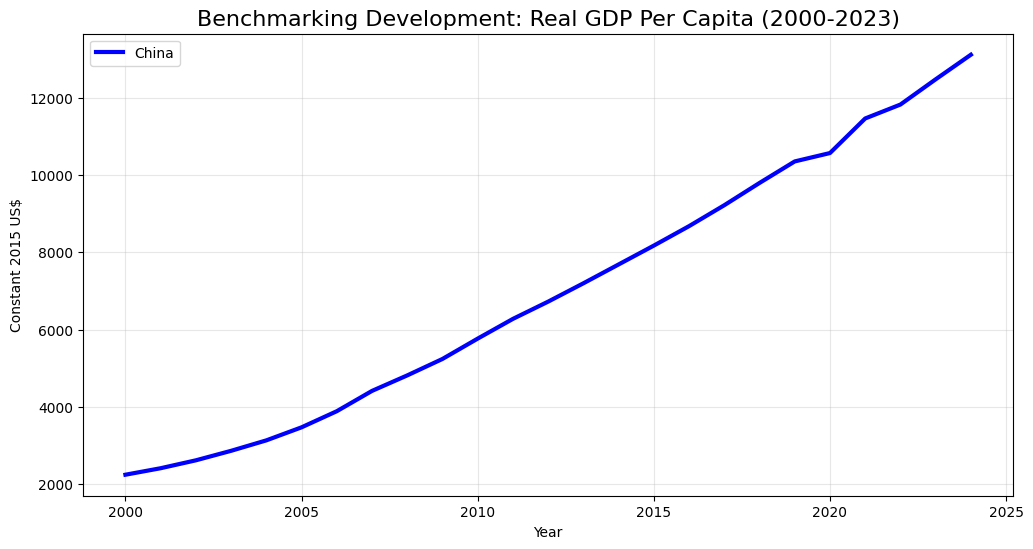

In [15]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

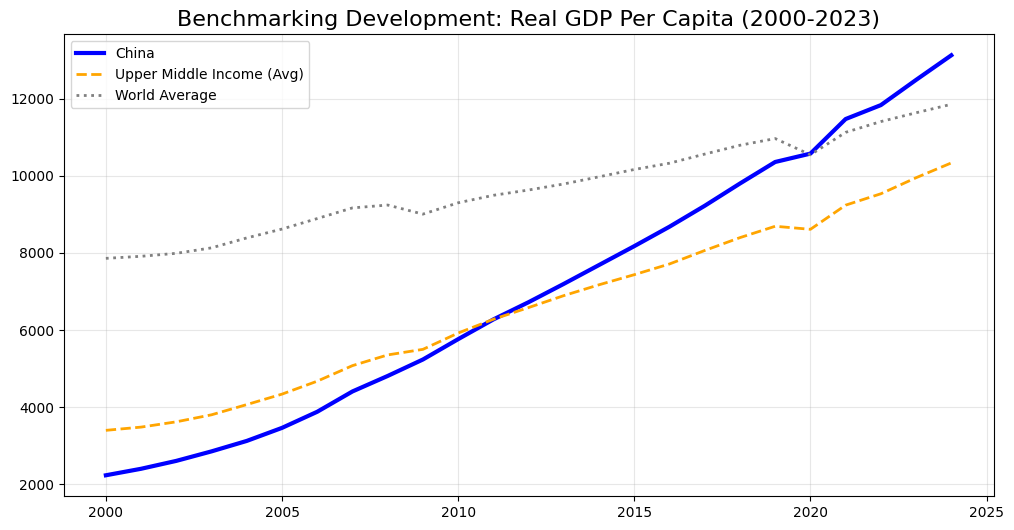

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

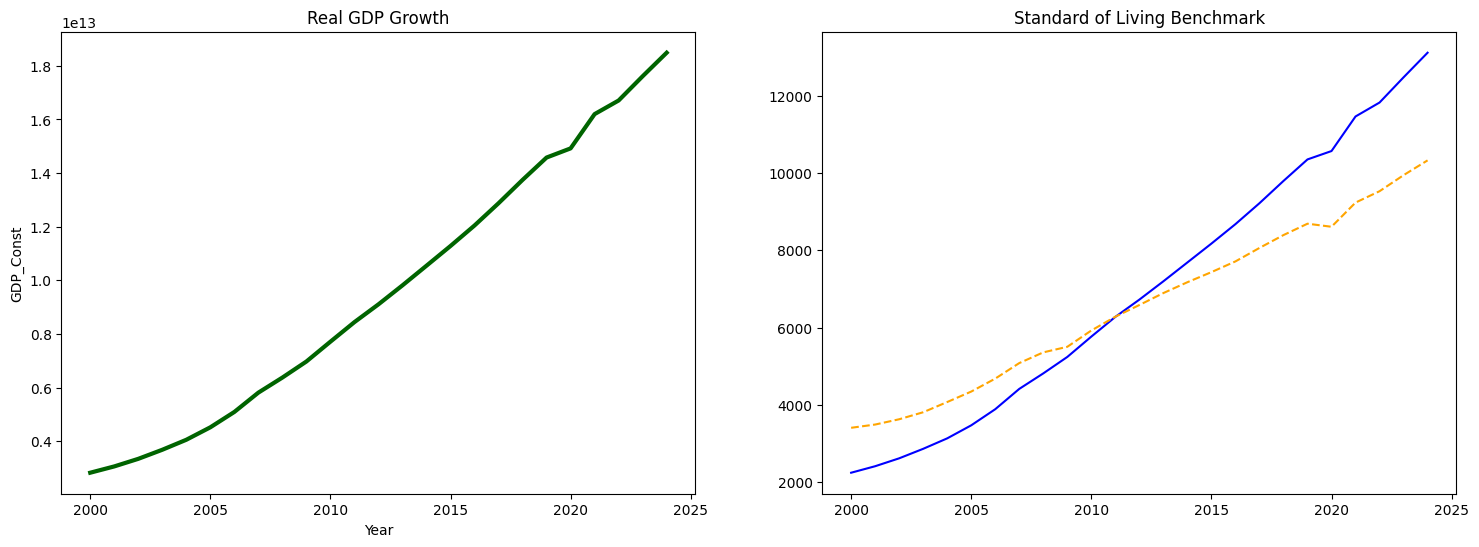

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_chn, x=df_chn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

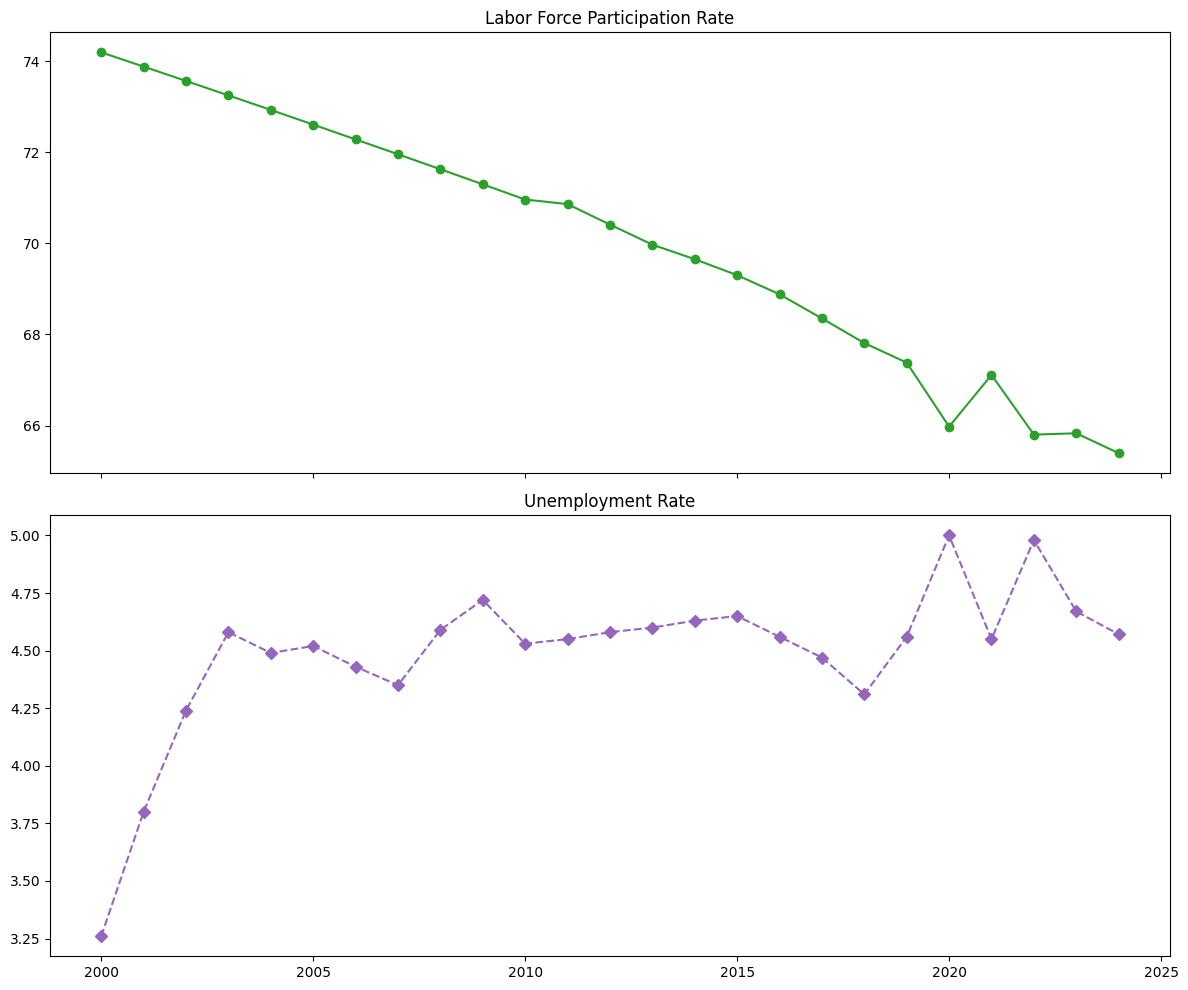

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_chn.index, df_chn['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_chn.index, df_chn['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

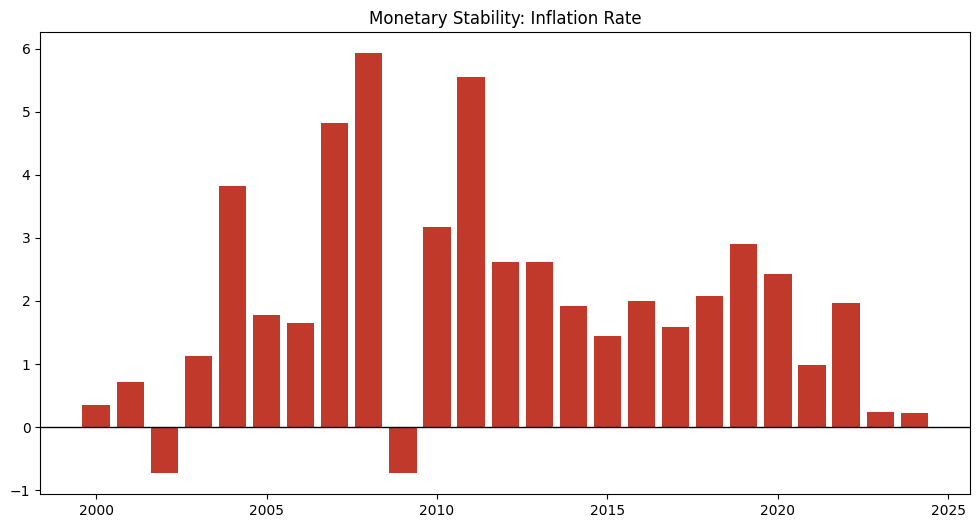

In [19]:
plt.figure(figsize=(12, 6))

plt.bar(df_chn.index, df_chn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

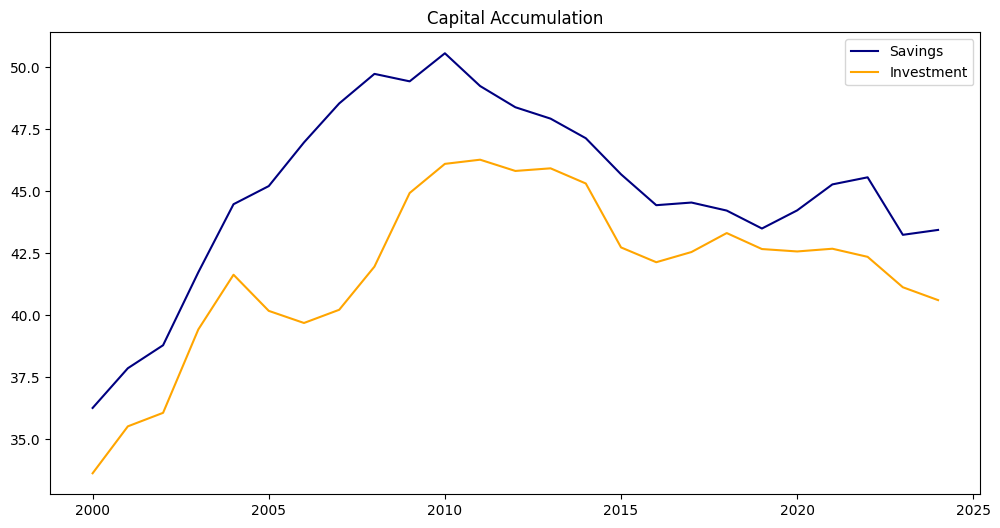

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

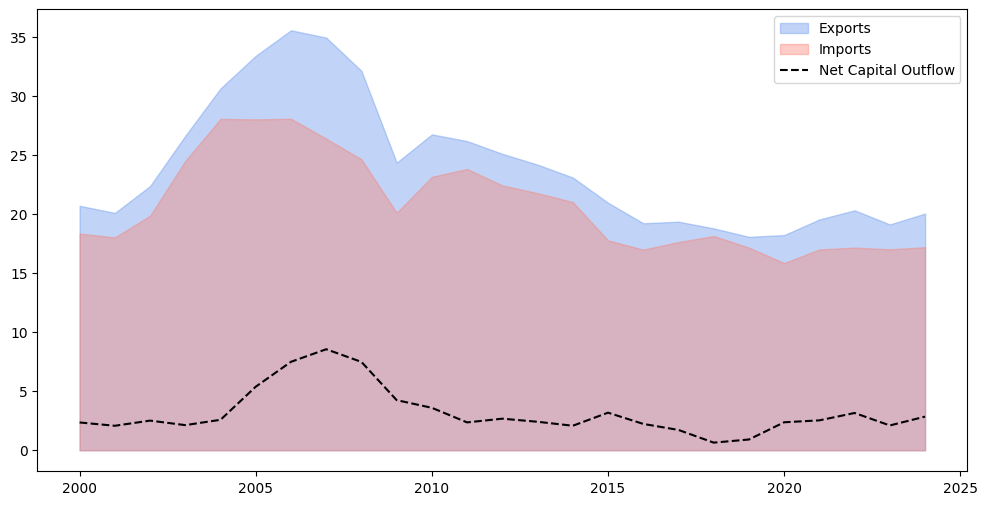

In [21]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

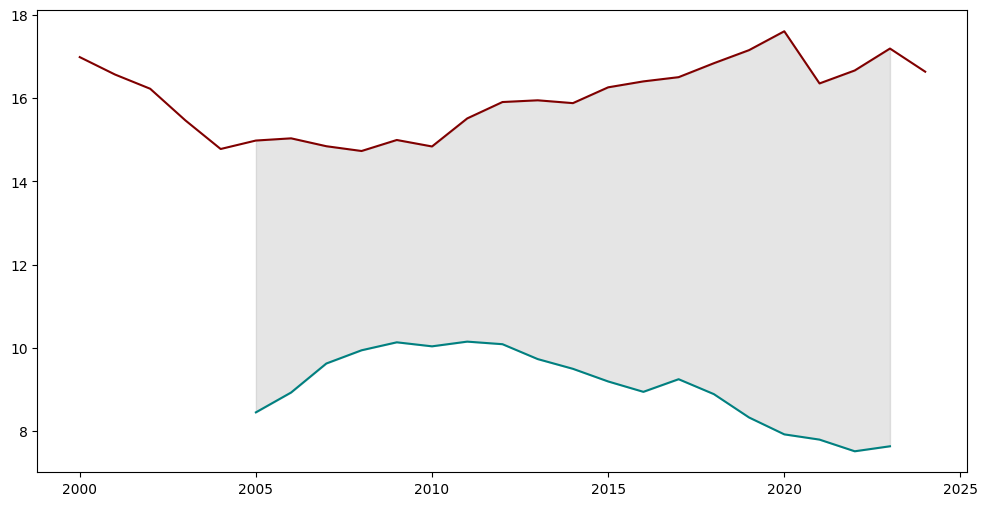

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

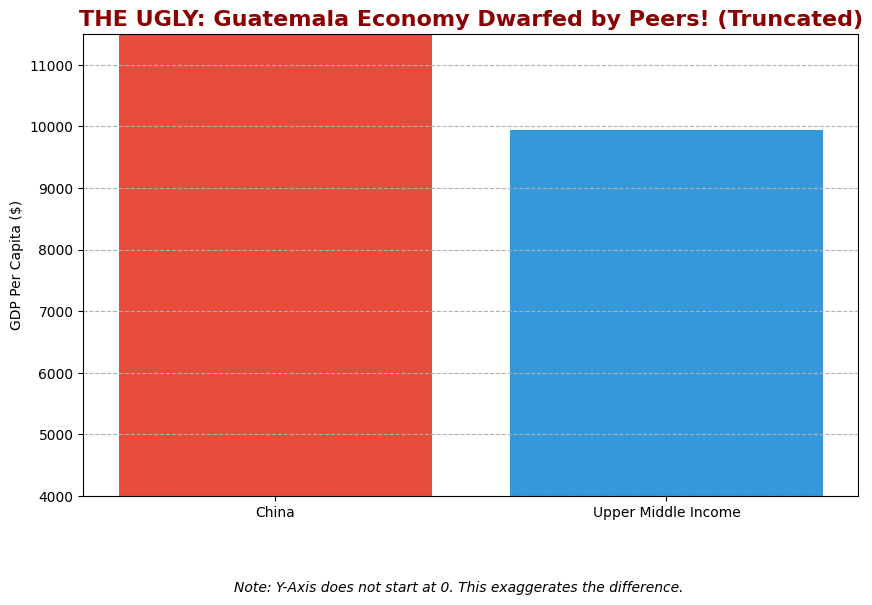

In [23]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
chn_val = df.loc[snapshot_year, ('CHN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [chn_val, umc_val]
labels = ['China', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# China is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes CHN look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

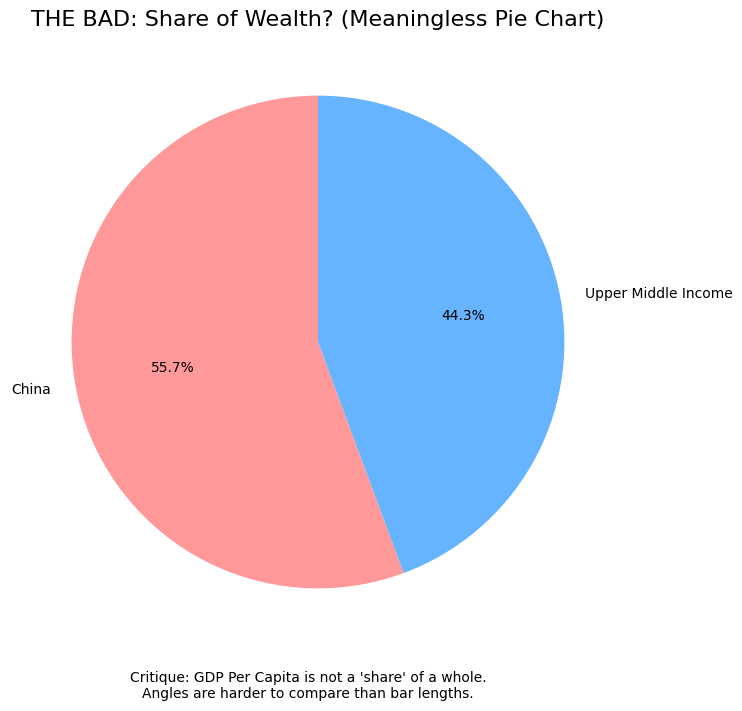

In [24]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

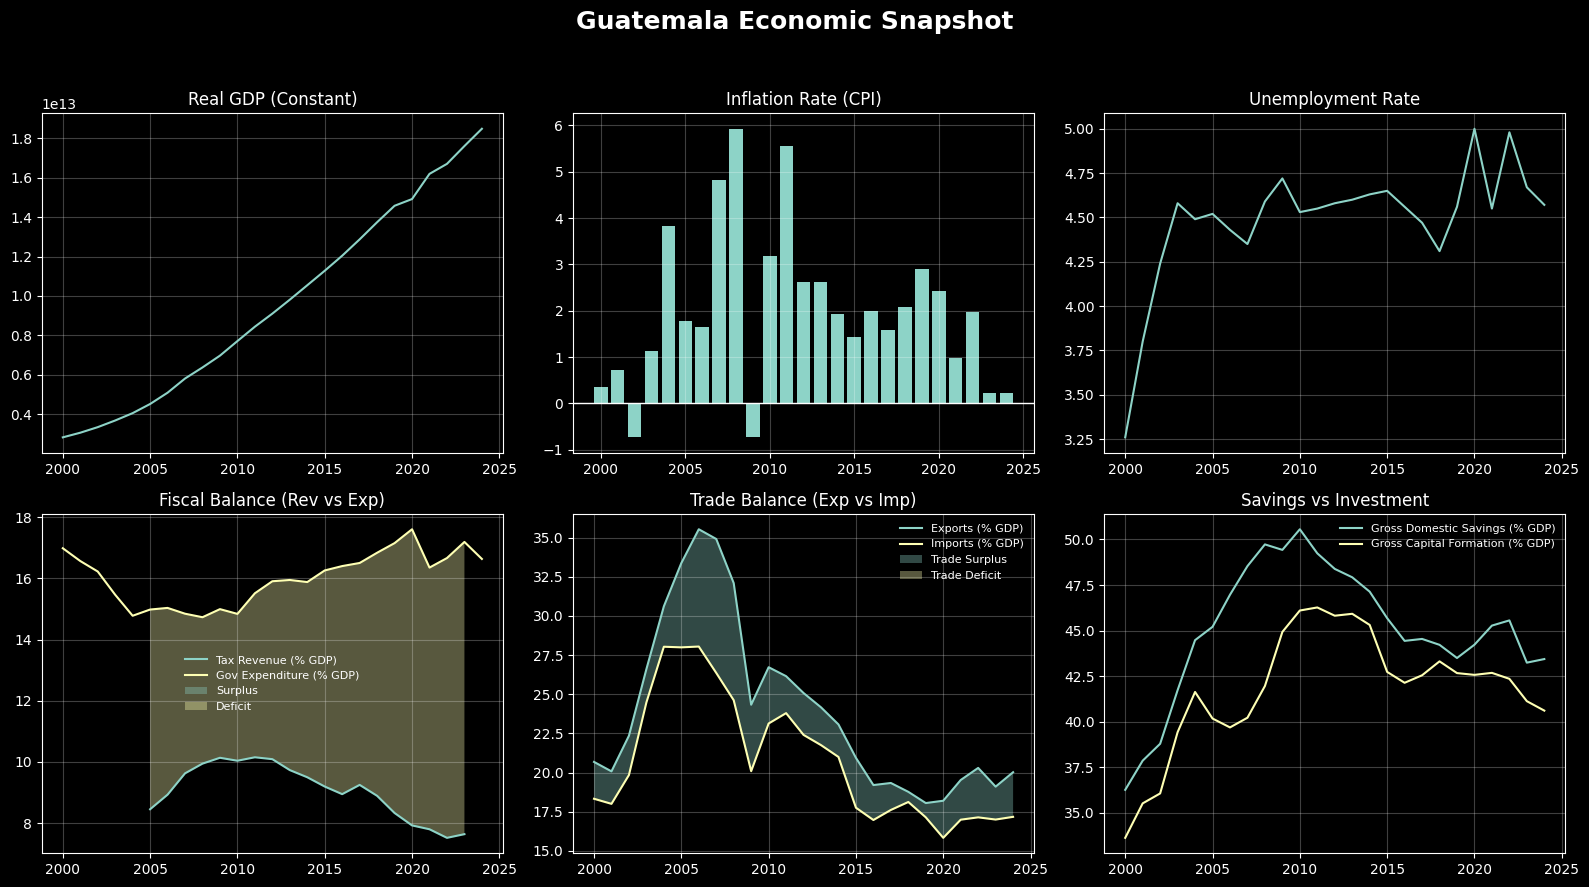

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Optional (only if you want Seaborn's nicer defaults)
# import seaborn as sns
# sns.set_context("notebook")

plt.style.use("dark_background")

# ---- Helper: choose x-axis ----
x = df_chn.index  # assume index is Year/Date

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle("Guatemala Economic Snapshot", fontsize=18, fontweight="bold")

# 1) Top Left: Real GDP (line)
ax = axes[0, 0]
ax.plot(x, df_chn["GDP_Const"])
ax.set_title("Real GDP (Constant)")
ax.set_xlabel("")
ax.grid(alpha=0.25)

# 2) Top Middle: Inflation (bar + 0 line)
ax = axes[0, 1]
ax.bar(x, df_chn["Inflation_CPI"])
ax.axhline(0, linewidth=1)
ax.set_title("Inflation Rate (CPI)")
ax.set_xlabel("")
ax.grid(alpha=0.25)

# 3) Top Right: Unemployment (line)
ax = axes[0, 2]
ax.plot(x, df_chn["Unemployment_Rate"])
ax.set_title("Unemployment Rate")
ax.set_xlabel("")
ax.grid(alpha=0.25)

# 4) Bottom Left: Fiscal Balance (fill between Tax Rev and Gov Exp)
ax = axes[1, 0]
tax = df_chn["Tax_Rev_GDP"]
gov = df_chn["Gov_Exp_GDP"]
gap = tax - gov  # positive = surplus, negative = deficit

ax.plot(x, tax, label="Tax Revenue (% GDP)")
ax.plot(x, gov, label="Gov Expenditure (% GDP)")

ax.fill_between(x, tax, gov, where=(gap >= 0), alpha=0.35, interpolate=True, label="Surplus")
ax.fill_between(x, tax, gov, where=(gap < 0),  alpha=0.35, interpolate=True, label="Deficit")

ax.set_title("Fiscal Balance (Rev vs Exp)")
ax.grid(alpha=0.25)
ax.legend(fontsize=8, frameon=False)

# 5) Bottom Middle: Trade Balance (fill between Exports and Imports)
ax = axes[1, 1]
exp = df_chn["Exports_GDP"]
imp = df_chn["Imports_GDP"]
tgap = exp - imp  # positive = trade surplus

ax.plot(x, exp, label="Exports (% GDP)")
ax.plot(x, imp, label="Imports (% GDP)")

ax.fill_between(x, exp, imp, where=(tgap >= 0), alpha=0.35, interpolate=True, label="Trade Surplus")
ax.fill_between(x, exp, imp, where=(tgap < 0),  alpha=0.35, interpolate=True, label="Trade Deficit")

ax.set_title("Trade Balance (Exp vs Imp)")
ax.grid(alpha=0.25)
ax.legend(fontsize=8, frameon=False)

# 6) Bottom Right: Savings vs Investment (dual lines)
ax = axes[1, 2]
ax.plot(x, df_chn["Gross_Dom_Savings"], label="Gross Domestic Savings (% GDP)")
ax.plot(x, df_chn["Gross_Cap_Formation"], label="Gross Capital Formation (% GDP)")
ax.set_title("Savings vs Investment")
ax.grid(alpha=0.25)
ax.legend(fontsize=8, frameon=False)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [26]:
df_chn.mean()

,0
series,
Inflation_CPI,2.017980e+00
Tax_Rev_GDP,9.057011e+00
Gov_Exp_GDP,1.601030e+01
Exports_GDP,2.396772e+01
Gross_Cap_Formation,4.181791e+01
Imports_GDP,2.078510e+01
GDP_Const,9.591887e+12
GDP_Per_Capita_Const,6.976270e+03
Gross_Dom_Savings,4.505467e+01


In [27]:
pd.options.display.float_format = '{:.2f}'.format
df_chn.mean()

,0
series,
Inflation_CPI,2.02
Tax_Rev_GDP,9.06
Gov_Exp_GDP,16.01
Exports_GDP,23.97
Gross_Cap_Formation,41.82
Imports_GDP,20.79
GDP_Const,9591886541657.96
GDP_Per_Capita_Const,6976.27
Gross_Dom_Savings,45.05
